C:\Users\dell\Desktop\Datasets\44latin1.mid
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
D2 38
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
E2 40
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G#2 44
F#2 42
B-2 46
G

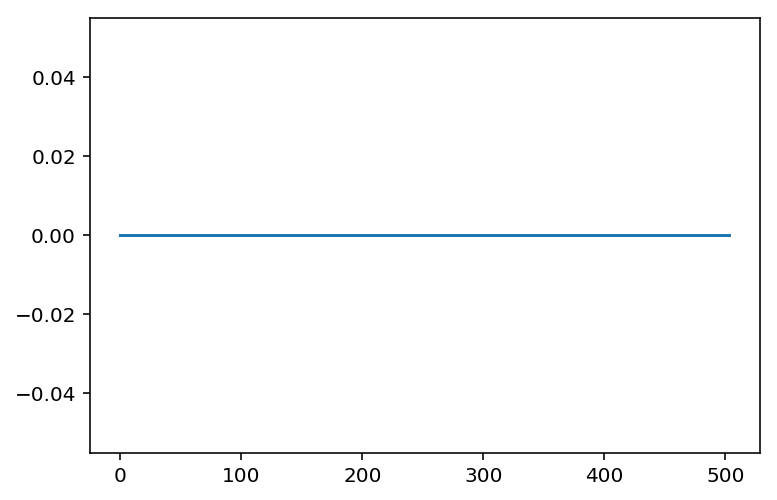

<Figure size 432x288 with 0 Axes>

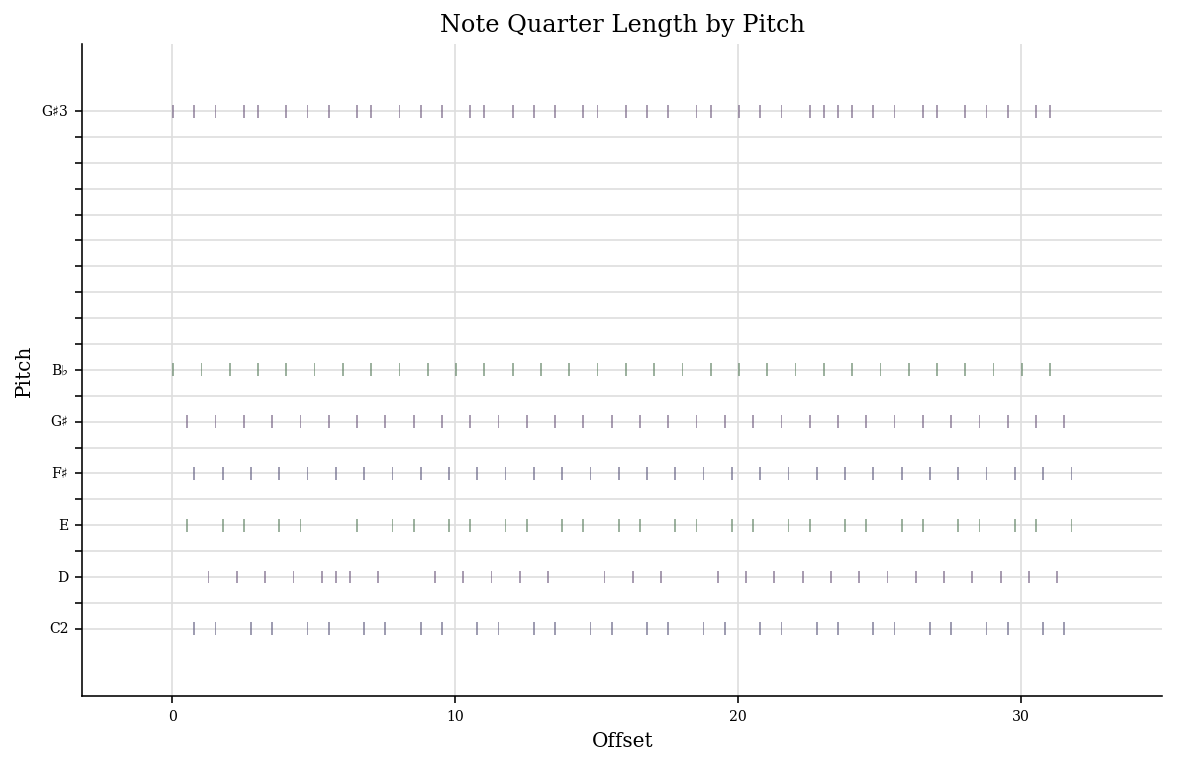

In [16]:
import math
import numpy as np
import os
from music21 import converter
import matplotlib.pyplot as plt


def get_start_time(el, measure_offset, quantization):
    if (el.offset is not None) and (el.measureNumber in measure_offset):
        return int(math.ceil(((measure_offset[el.measureNumber] or 0) + el.offset) * quantization))
    # Else, no time defined for this element and the functino return None


def get_end_time(el, measure_offset, quantization):
    if (el.offset is not None) and (el.measureNumber in measure_offset):
        return int(
            math.ceil(((measure_offset[el.measureNumber] or 0) + el.offset + el.duration.quarterLength) * quantization))
    # Else, no time defined for this element and the functino return None


def get_pianoroll_part(part, quantization):
    # Get the measure offsets
    measure_offset = {None: 0}
    for el in part.recurse(classFilter=('Measure')):
        measure_offset[el.measureNumber] = el.offset
        
    # Get the duration of the part
    duration_max = 0
    for el in part.recurse(classFilter=('Note', 'Rest')):
        t_end = get_end_time(el, measure_offset, quantization)
        if (t_end > duration_max):
            duration_max = t_end
            
    # Get the pitch and offset+duration
    piano_roll_part = np.zeros((128, math.ceil(duration_max)))
    for this_note in part.recurse(classFilter=('Note')):
        note_start = get_start_time(this_note, measure_offset, quantization)
        note_end = get_end_time(this_note, measure_offset, quantization)
        piano_roll_part[this_note.pitch.midi, note_start:note_end] = 1
        
        print(this_note.pitch,this_note.pitch.midi) #display correspondances beetween midi and pitch
    
    return piano_roll_part


# Here we provide a MIDI import function
def importMIDI(f):
    piece = converter.parse(f)
    all_parts = {}
    for part in piece.parts:
        try:
            track_name = part[0].bestName()
        except AttributeError:
            track_name = 'None'
        cur_part = get_pianoroll_part(part, 16);
        if (cur_part.shape[1] > 0):
            all_parts[track_name] = cur_part;
    print('Returning')
    return piece, all_parts


'''
Chargement des pistes midi du répertoire 

'''

root = r'C:\Users\dell\Desktop\Datasets'
list_dir = os.listdir(root)
#for data_file in list_dir:
#    if os.path.splitext(data_file)[1] == '.mid': #Verification files in the floder are midi files
#         track_path = os.path.join(root,data_file)

track_path = os.path.join(root,'44latin1.mid')
print(track_path)

piece, all_parts = importMIDI(track_path)
#print(type(piece.parts[0]))
#print(all_parts.keys())

'''
Enregistrement des matrices de séquences

'''   
plt.figure(1)
plt.plot(all_parts['None'][36])  

plt.figure(2)
piece.plot()

